In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [18]:
df=pd.read_csv("Placement_Data_Full_Class.csv")

In [19]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Data Description

1. sl_no is: the serial no of a candidate

2. ssc_p : ssc percentage of the candidate.

3. hsc_p : HCS percentage of the candidate.

4. degree_p : degree parcentage of the candidate

5. mba_p: MBA percentage of the candidate.

6. ssc_b : ssc passing board of the candidate.

7. HCS_b : hsc passing board of the candidate.

8. degree_t: candidate holding degree in 

9. hsc_s: stream candidate belong to

10. specialisation: canidate's specialized field.

11. workex: candidate work experience(Yes/No)

12. salary : salary of the candidate if palced

13. Status: placement status of the candidate(placed or not placed) TARGET COLUMN

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           199 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           203 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          197 non-null    object 
 14  salary          200 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [21]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,199.000000,203.000000,215.000000,215.000000,215.000000,200.000000
mean,108.000000,67.376432,66.146946,66.370186,72.100558,62.278186,193800.000000
std,62.209324,10.778873,10.527795,7.358743,13.275956,5.833385,153858.252327
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,54.500000,61.000000,61.000000,61.000000,60.000000,57.945000,0.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,161.500000,75.300000,73.000000,72.000000,83.500000,66.255000,287750.000000
max,215.000000,89.400000,97.000000,91.000000,98.000000,77.890000,940000.000000


In [22]:
df.isnull().sum()*100/len(df)

sl_no             0.000000
gender            0.000000
ssc_p             7.441860
ssc_b             0.000000
hsc_p             5.581395
hsc_b             0.000000
hsc_s             0.000000
degree_p          0.000000
degree_t          0.000000
workex            0.000000
etest_p           0.000000
specialisation    0.000000
mba_p             0.000000
status            8.372093
salary            6.976744
dtype: float64

In [23]:
df["status"].unique()

array(['Placed', 'Not Placed', nan], dtype=object)

In [24]:
df["salary"].unique()

array([270000., 200000., 250000.,      0., 425000., 252000., 231000.,
       260000., 218000., 300000., 236000., 265000., 393000., 360000.,
       240000., 350000., 278000., 320000., 411000., 287000., 204000.,
       450000., 216000., 220000.,     nan, 268000., 275000., 336000.,
       230000., 500000., 400000., 210000., 420000., 380000., 940000.,
       225000., 233000., 690000., 340000., 255000., 285000., 290000.,
       276000., 280000., 264000., 295000.])

In [25]:
df.drop_duplicates(keep="first",inplace=True)

In [26]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy="mean")

df[["salary","ssc_p","hsc_p"]]=si.fit_transform(df[["salary","ssc_p","hsc_p"]])

In [27]:
df.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,193800.0
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,NaN,295000.0
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,0.0


In [28]:
df.isnull().sum()*100/len(df)

sl_no             0.000000
gender            0.000000
ssc_p             0.000000
ssc_b             0.000000
hsc_p             0.000000
hsc_b             0.000000
hsc_s             0.000000
degree_p          0.000000
degree_t          0.000000
workex            0.000000
etest_p           0.000000
specialisation    0.000000
mba_p             0.000000
status            8.372093
salary            0.000000
dtype: float64

In [29]:
sm=SimpleImputer(missing_values=np.nan,strategy="most_frequent")

In [30]:
df[["status"]]=sm.fit_transform(df[["status"]])

In [31]:
df.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,193800.0
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,0.0


In [32]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# EDA

<AxesSubplot:xlabel='gender', ylabel='count'>

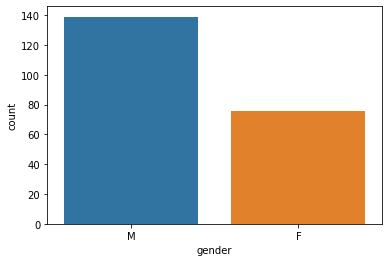

In [33]:
sns.countplot(x ='gender', data = df)

from the above bar's we can see that there are more male candidates than female. 

Text(0, 0.5, 'Number of Candidate')

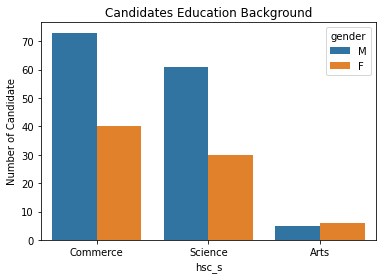

In [34]:
sns.countplot(data=df,x="hsc_s",hue="gender")
plt.title("Candidates Education Background")
plt.ylabel("Number of Candidate")

total number of candidates having commerce background are high than scienece and other stream. 

Text(0.5, 1.0, 'placement rate stream wise')

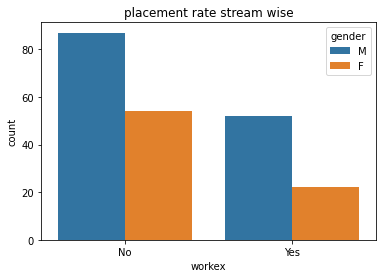

In [35]:
sns.countplot(data=df,x="workex",hue="gender")
plt.title("placement rate stream wise")

Male candidates are having more work experience than female.

<AxesSubplot:xlabel='gender', ylabel='salary'>

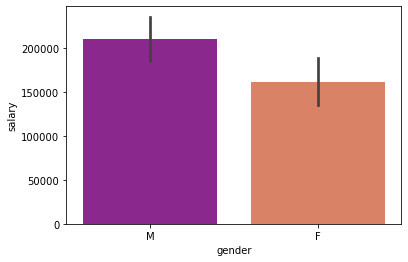

In [36]:
sns.barplot(x ='gender', y ='salary', data = df, palette ='plasma')

from the given data we can say that males are earning more than women. the difference is not too high but still there is a difference. 

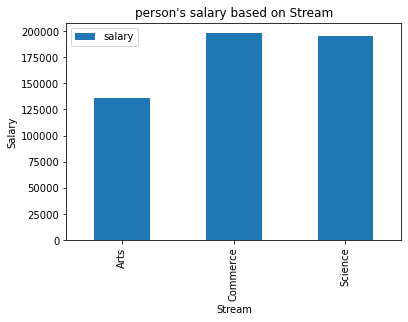

In [37]:
df.groupby("hsc_s")["salary"].mean().plot(kind="bar")
plt.title("person's salary based on Stream")
plt.ylabel("Salary")
plt.xlabel("Stream")

plt.legend()

from the above bar's we can clearly see that persons salary based on their education background. and there is high competetion between science and commerce

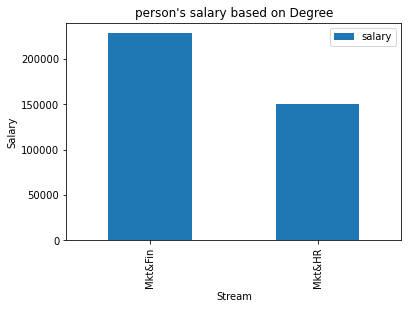

In [38]:
df.groupby("specialisation")["salary"].mean().plot(kind="bar")
plt.title("person's salary based on Degree")
plt.ylabel("Salary")
plt.xlabel("Stream")
plt.legend()

Here it is clearly visiable that the marketing and finance job holders are earning more than marketing and HR. 

Text(0.5, 0, 'Stream')

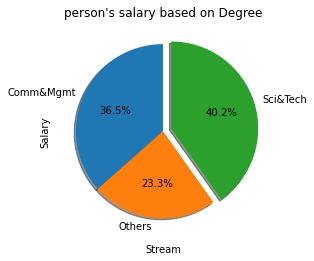

In [39]:
df.groupby("degree_t")["salary"].mean().plot(kind="pie",startangle=90,explode=[0,0,0.1],shadow=True,autopct="%2.1f%%")
plt.title("person's salary based on Degree")
plt.ylabel("Salary")
plt.xlabel("Stream")

Out of all the three field science and tech education background candidates are holding higher salary packages. 

Text(0, 0.5, 'No of candidates')

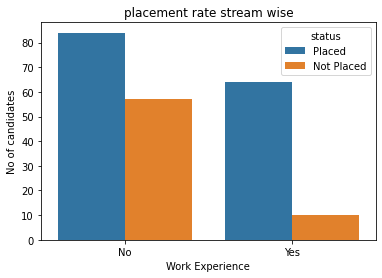

In [40]:
sns.countplot(data=df,x="workex",hue="status")
plt.title("placement rate stream wise")
plt.xlabel("Work Experience")
plt.ylabel("No of candidates")

the majority of candidates who got placed are freshers. and there are some candidates who have a work experience and still not placed.

Text(0.5, 0, 'field of education')

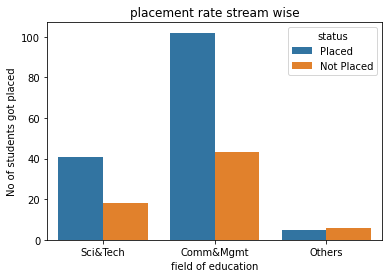

In [41]:
sns.countplot(data=df,x="degree_t",hue="status")
plt.title("placement rate stream wise")
plt.ylabel("No of students got placed")
plt.xlabel("field of education")

from the above bar's we can clearly see that commerce and managment field is having high number of student palced as compare to science & tech and others. and also most number of not placed students are more from comm & Mngt only. 

Text(0.5, 1.0, 'placement rate stream wise')

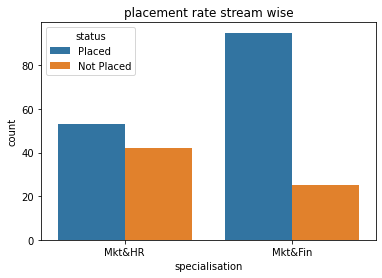

In [42]:
sns.countplot(data=df,x="specialisation",hue="status")
plt.title("placement rate stream wise")

Text(0, 0.5, 'Number of placements')

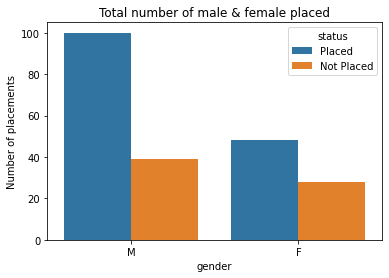

In [43]:
sns.countplot(data=df,x="gender",hue="status")
plt.title("Total number of male & female placed")
plt.ylabel("Number of placements")

<AxesSubplot:>

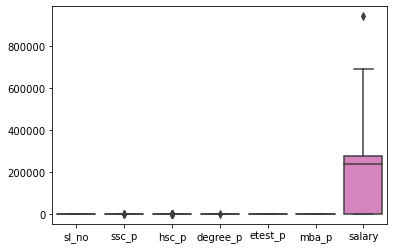

In [46]:
sns.boxplot(data=df)

In [354]:
df.head(3)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0


In [355]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [356]:
df.drop(["sl_no","specialisation"],axis=1,inplace=True)

In [357]:
c_col= df.select_dtypes("object").columns

In [358]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

df[c_col]= oe.fit_transform(df[c_col])



In [359]:
df["status"]=df["status"].astype("int64")
df["salary"]=df["salary"].astype("int64")

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    215 non-null    float64
 1   ssc_p     215 non-null    float64
 2   ssc_b     215 non-null    float64
 3   hsc_p     215 non-null    float64
 4   hsc_b     215 non-null    float64
 5   hsc_s     215 non-null    float64
 6   degree_p  215 non-null    float64
 7   degree_t  215 non-null    float64
 8   workex    215 non-null    float64
 9   etest_p   215 non-null    float64
 10  mba_p     215 non-null    float64
 11  status    215 non-null    int64  
 12  salary    215 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 23.5 KB


In [361]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,mba_p,status,salary
0,1.0,67.00,1.0,91.00,1.0,1.0,58.00,2.0,0.0,55.0,58.80,1,270000
1,1.0,79.33,0.0,78.33,1.0,2.0,77.48,2.0,1.0,86.5,66.28,1,200000
2,1.0,65.00,0.0,68.00,0.0,0.0,64.00,0.0,0.0,75.0,57.80,1,250000
3,1.0,56.00,0.0,52.00,0.0,2.0,52.00,2.0,0.0,66.0,59.43,0,0
4,1.0,85.80,0.0,73.60,0.0,1.0,73.30,0.0,0.0,96.8,55.50,1,425000


<AxesSubplot:>

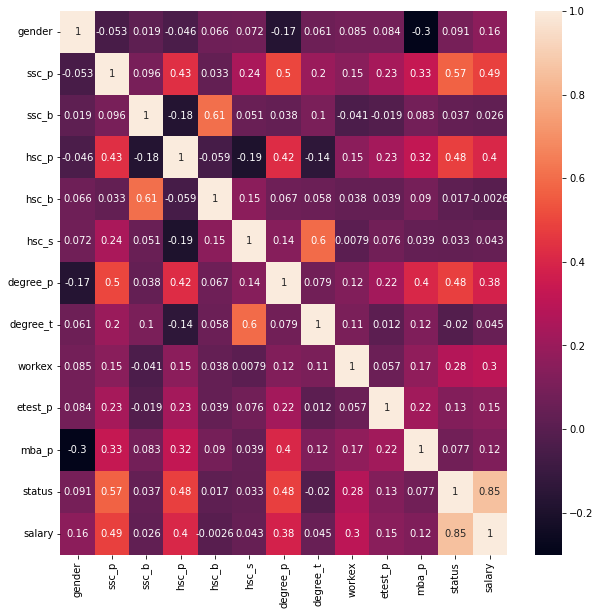

In [362]:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)



In [363]:
df["status"].value_counts()

1    148
0     67
Name: status, dtype: int64

In [364]:
features= df.drop(["status"],axis=1)

In [365]:
target= df["status"]

In [366]:
#from sklearn.preprocessing import StandardScaler
#si=StandardScaler()
#features.iloc[:,:]=si.fit_transform(features.iloc[:,:])

In [367]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.3,random_state=1)

In [368]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()
lr.fit(xtrain,ytrain)
ypred= lr.predict(xtest)

In [369]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.98      0.98      0.98        45

    accuracy                           0.97        65
   macro avg       0.96      0.96      0.96        65
weighted avg       0.97      0.97      0.97        65



In [370]:
from sklearn.decomposition import PCA

pc=PCA(n_components=5,random_state=1)

xtrain_p= pc.fit_transform(xtrain)
xtest_p= pc.fit_transform(xtest)

In [371]:
model= LogisticRegression()
model.fit(xtrain_p,ytrain)
ypred= model.predict(xtest_p)


print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.98      1.00      0.99        45

    accuracy                           0.98        65
   macro avg       0.99      0.97      0.98        65
weighted avg       0.98      0.98      0.98        65



In [372]:
from sklearn.neighbors import KNeighborsClassifier

In [373]:
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred= knn.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.98      1.00      0.99        45

    accuracy                           0.98        65
   macro avg       0.99      0.97      0.98        65
weighted avg       0.98      0.98      0.98        65



In [374]:
traina=[]
testa=[]

for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    
    tr=knn.score(xtrain,ytrain)
    te=knn.score(xtest,ytest)
    
    
    traina.append(tr)
    testa.append(te)

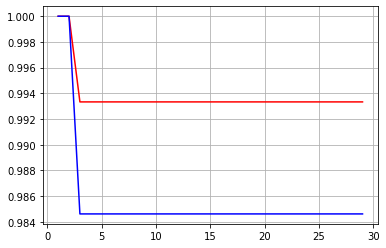

In [375]:
plt.plot(range(1,30),traina,color="red")
plt.plot(range(1,30),testa,color="blue")
plt.grid()
plt.show()


In [376]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(xtrain,ytrain)
ypred= knn.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        45

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65

